In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,r2_score, roc_auc_score

In [3]:
df = pd.read_csv("Fraud_Log.csv")
df.dropna(inplace=True)

In [4]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
num_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
numerics_df = df[num_cols].reset_index(drop=True)

In [8]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
encoder_type = OneHotEncoder(sparse_output=False,drop = None)

In [11]:
type_en = encoder_type.fit_transform(df[['type']])

In [12]:
encoded_type = pd.DataFrame(type_en,columns=encoder_type.get_feature_names_out(['type']))

In [13]:
df_encoded = pd.concat([encoded_type,numerics_df],axis=1)

In [ ]:
df_encoded.head(20)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.0,0.0,1.0,0.0,1,9839.64,170136.00,160296.36,0.0,0.00
1,0.0,0.0,0.0,1.0,0.0,1,1864.28,21249.00,19384.72,0.0,0.00
2,0.0,0.0,0.0,0.0,1.0,1,181.00,181.00,0.00,0.0,0.00
3,0.0,1.0,0.0,0.0,0.0,1,181.00,181.00,0.00,21182.0,0.00
4,0.0,0.0,0.0,1.0,0.0,1,11668.14,41554.00,29885.86,0.0,0.00
5,0.0,0.0,0.0,1.0,0.0,1,7817.71,53860.00,46042.29,0.0,0.00
6,0.0,0.0,0.0,1.0,0.0,1,7107.77,183195.00,176087.23,0.0,0.00
7,0.0,0.0,0.0,1.0,0.0,1,7861.64,176087.23,168225.59,0.0,0.00
8,0.0,0.0,0.0,1.0,0.0,1,4024.36,2671.00,0.00,0.0,0.00
9,0.0,0.0,1.0,0.0,0.0,1,5337.77,41720.00,36382.23,41898.0,40348.79


## BarPlot and DonutPlot For Definitions ##

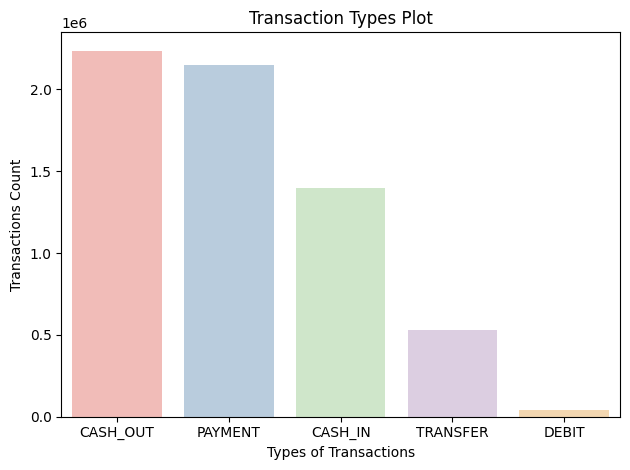

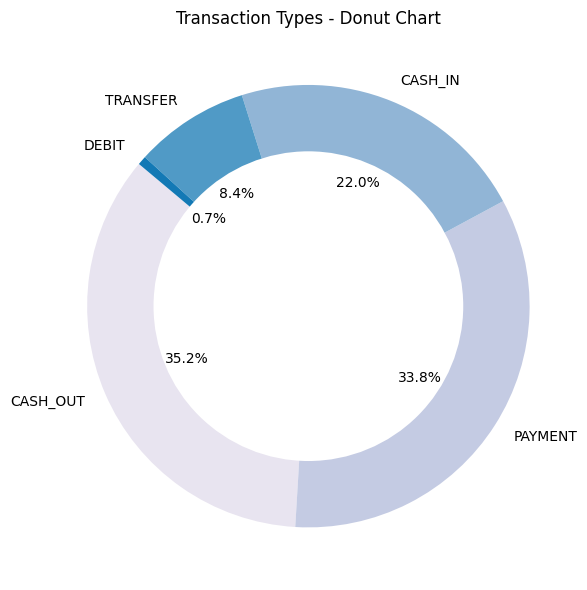

In [34]:
type_c = df['type'].value_counts().reset_index()
type_c.columns = ['type','count']
plt.Figure(figsize=(10,5))
sns.barplot(x='type',y='count',hue='type',data = type_c,palette='Pastel1', legend=None)
plt.title('Transaction Types Plot')
plt.xlabel('Types of Transactions')
plt.ylabel('Transactions Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(type_c['count'], labels=type_c['type'], autopct='%1.1f%%', colors=sns.color_palette('PuBu'), startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Transaction Types - Donut Chart')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [15]:
x = df_encoded
y = df['isFraud'].values

In [16]:
scaled = StandardScaler()
x_scaler = scaled.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.7)


In [20]:
log = LogisticRegression(max_iter=100000,class_weight='balanced')

In [21]:
log.fit(x_train,y_train)
y_pred_log = log.predict(x_train)
y_pred_log_test = log.predict(x_test)

In [22]:
print("Logistic Train Accuracy: ", accuracy_score(y_train, y_pred_log)*100)
print("Logistic Test Accuracy: ", accuracy_score(y_test, y_pred_log_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_test))
print("Classification Report:\n", classification_report(y_test, y_pred_log_test))

Logistic Train Accuracy:  94.71412719917267
Logistic Test Accuracy:  94.72849684114854
Confusion Matrix:
 [[4213523  234538]
 [    246    5527]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   4448061
           1       0.02      0.96      0.04      5773

    accuracy                           0.95   4453834
   macro avg       0.51      0.95      0.51   4453834
weighted avg       1.00      0.95      0.97   4453834



In [18]:
dec = DecisionTreeClassifier(max_depth=10,min_samples_split=5,min_samples_leaf=4,class_weight='balanced')
dec.fit(x_train, y_train)
y_pred_train = dec.predict(x_train)
y_pred_dec = dec.predict(x_test)

In [19]:
print("Decision Tree Train Accuracy: ", accuracy_score(y_train, y_pred_train)*100)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dec)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))
print("Classification Report:\n", classification_report(y_test, y_pred_dec))

Decision Tree Train Accuracy:  99.12499358230833
Decision Tree Accuracy:  99.12619105247299
Confusion Matrix:
 [[4409283   38778]
 [    140    5633]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   4448061
           1       0.13      0.98      0.22      5773

    accuracy                           0.99   4453834
   macro avg       0.56      0.98      0.61   4453834
weighted avg       1.00      0.99      0.99   4453834



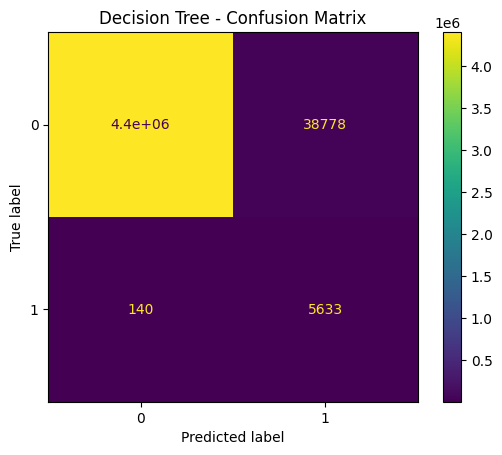

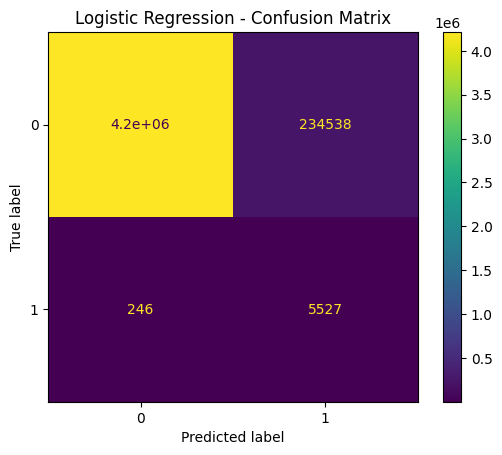

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dec)
plt.title('Decision Tree - Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_test)
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

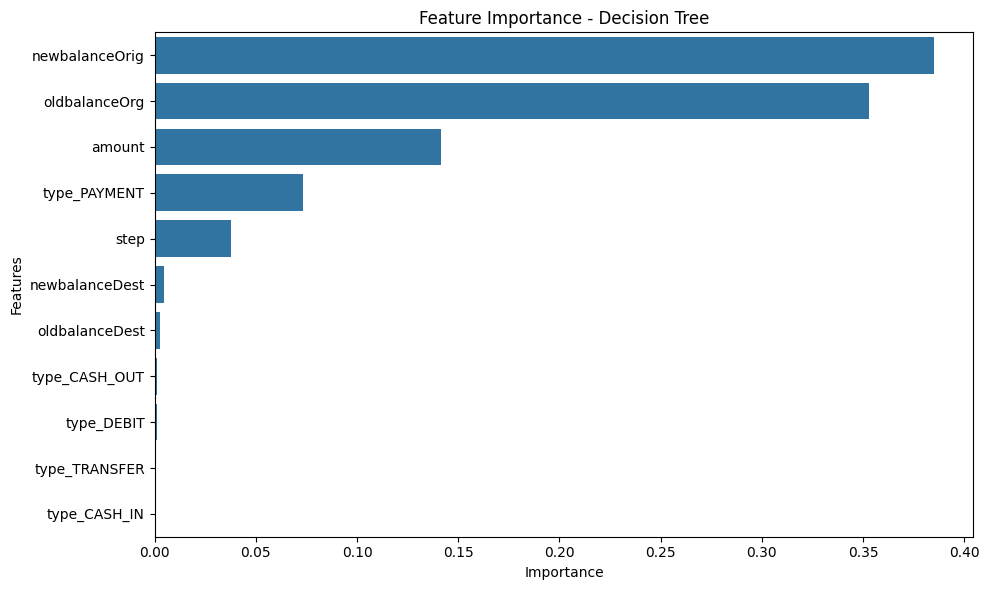

In [36]:
importances = dec.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()